In [6]:
# Load the CSV file (update the path if necessary)
df = pd.read_csv("Resources/amazon_sale_report.csv", low_memory=False)  # Ensure the correct path

In [7]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [25]:
df.rename(columns={'ship-state': 'State'}, inplace=True)

In [26]:
df['State'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [28]:
# Step 3: Define a mapping of common errors or abbreviations to correct names
state_corrections = {
    'Pondicherry': 'Puducherry',
    'Orissa': 'Odisha',
    'Rajsthan': 'Rajasthan',
    'Rajshthan': 'Rajasthan',
    'Rj': 'Rajasthan',
    'Pb': 'Punjab',
    'Nl': 'Nagaland',
    'New Delhi': 'Delhi',
    'Punjab/Mohali/Zirakpur': 'Punjab',
    'Apo': None,  # Drop these rows if it's not valid
    'Ar': 'Arunachal Pradesh',
    'Dadra And Nagar': 'Dadra and Nagar Haveli and Daman and Diu',
    # Handle missing or NaN
    None: None,  # Retain NaNs as is or drop them later
    'nan': None  # Handle missing values
}

df['State'] = df['State'].replace(state_corrections)

In [46]:
df['State'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', None,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajasthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'Puducherry', 'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP',
       'goa', 'PB', 'APO', 'Arunachal Pradesh', 'AR', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Meghalaya'], dtype=object)

In [50]:
cleaned_states_ut = [
    'MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU', 'UTTAR PRADESH',
    'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH', 'RAJASTHAN', 'DELHI',
    'HARYANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ODISHA', 'KERALA',
    'MADHYA PRADESH', 'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND',
    'BIHAR', 'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH', 'ARUNACHAL PRADESH',
    'MANIPUR', 'Goa', 'MEGHALAYA', 'TRIPURA', 'LADAKH', 'Dadra and Nagar Haveli and Daman and Diu',
    'Sikkim', 'Andaman & Nicobar Islands', 'LAKSHADWEEP'
]



In [51]:
cleaned_df = df[df['State'].isin(cleaned_states_ut)]

In [52]:
cleaned_df['State'].nunique()

33

In [56]:
cleaned_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,State,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [70]:
stats_df = cleaned_df[['Order ID', 'Date', 'Status', 'Fulfilment', 'ship-city', 'State','Amount']]
stats_df.head()

,Order ID,Date,Status,Fulfilment,ship-city,State,Amount
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,MUMBAI,MAHARASHTRA,647.62
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,BENGALURU,KARNATAKA,406.00
2,404-0687676-7273146,04-30-22,Shipped,Amazon,NAVI MUMBAI,MAHARASHTRA,329.00
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,PUDUCHERRY,PUDUCHERRY,753.33
4,407-1069790-7240320,04-30-22,Shipped,Amazon,CHENNAI,TAMIL NADU,574.00


In [71]:
final_stats_df = stats_df.rename(columns={'ship-city': 'City'})

In [72]:
# Clean the data: Convert 'Date' column and drop missing 'Amount'
final_stats_df['Date'] = pd.to_datetime(final_stats_df['Date'], errors='coerce')
df_cleaned = final_stats_df.dropna(subset=['Date', 'Amount'])  # Clean invalid dates and amounts
df_cleaned.set_index('Date', inplace=True)

# Aggregate revenue by month
monthly_revenue = df_cleaned.resample('M')['Amount'].sum()

# Fit the ARIMA model for monthly revenue forecasting
try:
    model = ARIMA(monthly_revenue, order=(1, 1, 1))  # Configure (p, d, q) parameters
    model_fit = model.fit()

    # Print the model summary
    print(model_fit.summary())

    # Forecast the next 12 months of revenue
    forecast = model_fit.forecast(steps=12)  # 12 months into the future
    print("12-Month Revenue Forecast:")
    print(forecast)

except Exception as e:
    print(f"Error: {e}")

C:\Users\44rul\AppData\Local\Temp\ipykernel_35428\2864462738.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_stats_df['Date'] = pd.to_datetime(final_stats_df['Date'], errors='coerce')
C:\Users\44rul\AppData\Local\Temp\ipykernel_35428\2864462738.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df_cleaned.resample('M')['Amount'].sum()
C:\Users\44rul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\44rul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                    4
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -54.188
Date:                Wed, 23 Oct 2024   AIC                            114.376
Time:                        00:37:10   BIC                            111.672
Sample:                    03-31-2022   HQIC                           108.941
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6521      3.971      0.164      0.870      -7.131       8.435
ma.L1         -0.9994      1.929     -0.518      0.604      -4.780       2.782
sigma2      1.587e+14   1.22e-14    1.3e+28      0.0

C:\Users\44rul\AppData\Local\Temp\ipykernel_35428\98763648.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2022-07-01', periods=12, freq='M')


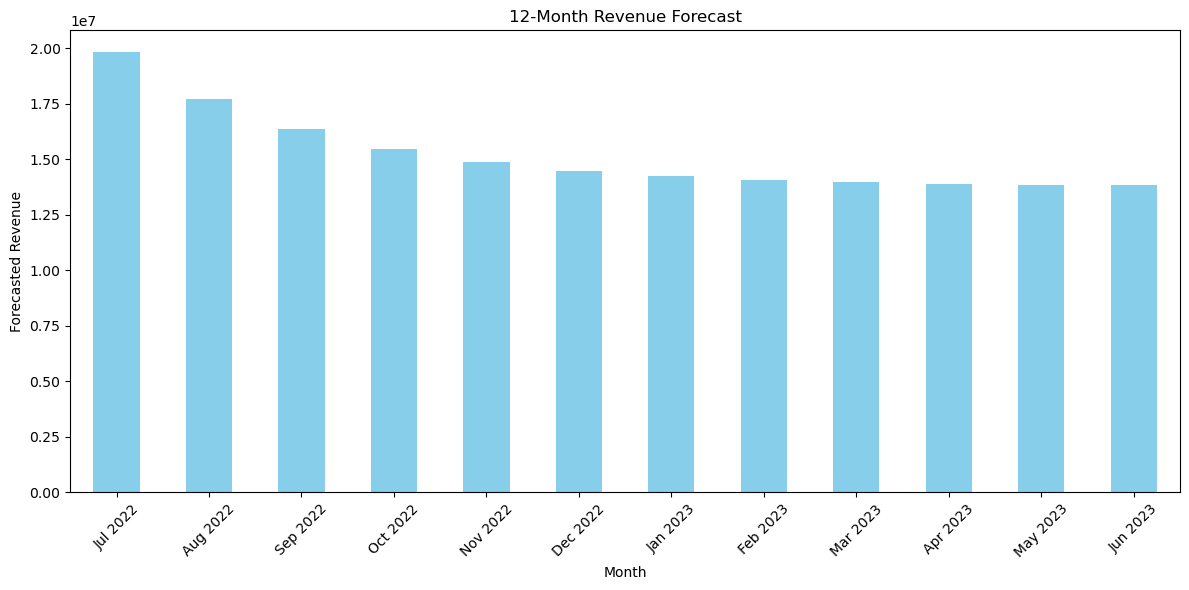

In [73]:
# Plot forecast as a bar chart
forecast.plot(kind='bar', legend=False, figsize=(12, 6), color='skyblue')

# Create a forecast index (monthly with a given start date)
forecast_index = pd.date_range(start='2022-07-01', periods=12, freq='M')

# Assign the index to the forecast
forecast.index = forecast_index

# Set x-ticks and labels properly
plt.xticks(ticks=range(12), labels=forecast_index.strftime('%b %Y'), rotation=45)
plt.title('12-Month Revenue Forecast')
plt.xlabel('Month')
plt.ylabel('Forecasted Revenue')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Resources/Stats_Models_Forecast.png', format='png', dpi=85, bbox_inches='tight')

# Display the plot
plt.show()

In [3]:
df = df.dropna(subset=['State'])  # Drop rows with missing ship-state
df['State'] = df['State'].astype('category')

In [74]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Create the 'delivery_time' column by subtracting the shipping date from a fixed delivery date
final_stats_df['delivery_time'] = (pd.to_datetime('2022-05-01') - final_stats_df['Date']).dt.days

# Fit the ANOVA model
model = ols('(delivery_time) ~ C(State)', data=final_stats_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq        df          F        PR(>F)
C(State)  2.210532e+05      32.0  10.427516  7.581615e-52
Residual  8.395476e+07  126730.0        NaN           NaN
